# ***HW03***
---

### ***Problem02***

In [ ]:
### Decision Tree Alogirhtm
class DecisionTreeClassifier(object):
    """
    Decition Tree Algorithm Parameter: max_depth
    When data set comes in, find the best column to split after that get the Information Gain to get next candidate feature 
    The seleceted column will get the best cutoff value searched by all range of pre-cutoff values 
    Fit the selected features and branch out the left and right tree. Repeat it again 
    """
    def __init__(self, max_depth):
        self.depth = 0
        self.max_depth = max_depth
    
    def fit(self, x, y, par_node={}, depth=0):
        """Build parent node of the tree and draw it"""
        import numpy as np
        if par_node is None: 
            return None
        elif len(y) == 0:
            return None
        elif self.all_same(y):
            return {'val':y[0]}
        elif depth >= self.max_depth:
            return None
        else: 
            col, cutoff, entropy = self.find_best_split_of_all(x, y)    # find one split given an information gain 
            y_left = y[x[:, col] < cutoff]
            y_right = y[x[:, col] >= cutoff]
            par_node = {'col': iris.feature_names[col], 'index_col':col,
                        'cutoff':cutoff,
                       'val': np.round(np.mean(y))}
            par_node['left'] = self.fit(x[x[:, col] < cutoff], y_left, {}, depth+1)
            par_node['right'] = self.fit(x[x[:, col] >= cutoff], y_right, {}, depth+1)
            self.depth += 1 
            self.trees = par_node
            return par_node
    
    def find_best_split_of_all(self, x, y):
        """Using information Gain to find next feature"""
        col = None
        min_entropy = 1
        cutoff = None
        all_cutoff = []
        all_entropies = []
        compare_entropy = [] 
        for i, c in enumerate(x.T):
            entropy, cur_cutoff = self.find_best_split(c, y)
            if entropy == 0:    # find the first perfect cutoff. Stop Iterating
                return i, cur_cutoff, entropy
            elif entropy <= min_entropy:
                min_entropy = entropy
                col = i
                cutoff = cur_cutoff

        # Set past i and entropy to get Gain information 
        past_i, past_entropy = col, min_entropy*1.0      
        # Get all entropies and cut-off in the array
        for i, c in enumerate(x.T):
          """Will be used to compare to find best feature"""
          entropy, cutoff = self.find_best_split(c, y)
          all_entropies.append(entropy) 
          all_cutoff.append(cutoff)
        # Find next feature via Gain information 
        for i in range(len(all_entropies)):
          info_gain = past_entropy - all_entropies[i]
          compare_entropy.append(info_gain)
        min_entropy = [x for x in compare_entropy if x!=0]
        min_entropy = min(min_entropy)
        col_next = compare_entropy.index(min_entropy)
        min_entropy = all_entropies[col_next]
        cutoff = all_cutoff[col_next]
        return col_next, cutoff, min_entropy  
    
    def find_best_split(self, col, y):
        min_entropy = 10
        n = len(y)
        for value in set(col):
            y_predict = col < value 
            my_entropy = get_entropy(y_predict, y)
            if my_entropy <= min_entropy:
                min_entropy = my_entropy
                cutoff = value
        return min_entropy, cutoff
    
    def all_same(self, items):
        return all(x == items[0] for x in items)
                                           
    def predict(self, x):
        tree = self.trees
        results = np.array([0]*len(x))
        for i, c in enumerate(x):
            results[i] = self._get_prediction(c)
        return results
    
    def _get_prediction(self, row):
        cur_layer = self.trees
        while cur_layer.get('cutoff'):
            if row[cur_layer['index_col']] < cur_layer['cutoff']:
                cur_layer = cur_layer['left']
            else:
                cur_layer = cur_layer['right']
        else:
            return cur_layer.get('val')

In [ ]:
### Entropy Functions
def entropy_func(c, n):
    import math
    """Entropy Formula"""
    return -(c*1.0/n)*math.log(c*1.0/n, 2)

def entropy_cal(c1, c2):
    """
    Returns entropy
    c1: Count of Class01
    c2: Count of Class02
    """
    if c1== 0 or c2 == 0:  
        return 0
    return entropy_func(c1, c1+c2) + entropy_func(c2, c1+c2)

# get the entropy of one big circle showing above
def entropy_of_one_division(division): 
    """Returns entropy of a divided group of data"""
    s = 0
    n = len(division)
    classes = set(division)
    for c in classes:   # for each class, get entropy
        n_c = sum(division==c)
        e = n_c*1.0/n * entropy_cal(sum(division==c), sum(division!=c)) # weighted avg
        s += e
    return s, n

# The whole entropy of two big circles combined
def get_entropy(y_predict, y_real):
    """Returns entropy of a split"""
    if len(y_predict) != len(y_real):
        print('They have to be the same length')
        return None
    n = len(y_real)
    s_true, n_true = entropy_of_one_division(y_real[y_predict]) # left hand side entropy
    s_false, n_false = entropy_of_one_division(y_real[~y_predict]) # right hand side entropy
    s = n_true*1.0/n * s_true + n_false*1.0/n * s_false # overall entropy, again weighted average
    return s

### Implement Algorithm in Iris data set
from sklearn.datasets import load_iris
from pprint import pprint
iris = load_iris()
x = iris.data
y = iris.target
clf = DecisionTreeClassifier(max_depth=6)
result = clf.fit(x, y)
pprint(result)

{'col': 'sepal width (cm)',
 'cutoff': 3.4,
 'index_col': 1,
 'left': {'col': 'sepal width (cm)',
          'cutoff': 2.5,
          'index_col': 1,
          'left': {'col': 'sepal width (cm)',
                   'cutoff': 2.4,
                   'index_col': 1,
                   'left': {'col': 'sepal width (cm)',
                            'cutoff': 2.2,
                            'index_col': 1,
                            'left': {'val': 1},
                            'right': {'col': 'sepal width (cm)',
                                      'cutoff': 2.2,
                                      'index_col': 1,
                                      'left': None,
                                      'right': {'col': 'sepal width (cm)',
                                                'cutoff': 2.2,
                                                'index_col': 1,
                                                'left': None,
                                                'right': N

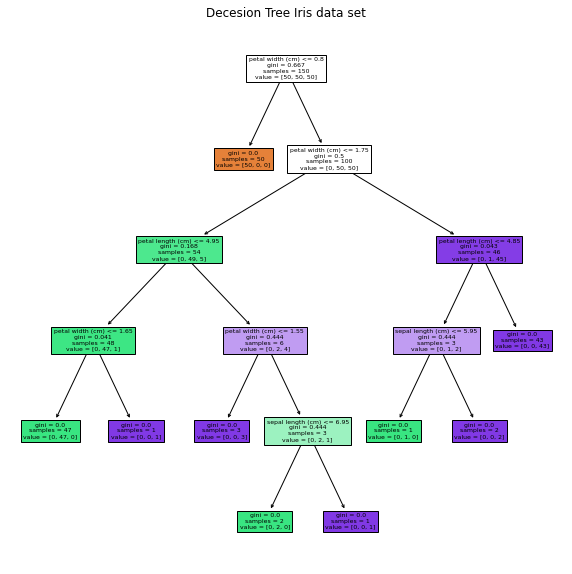

In [ ]:
### Sikit Learn Decision Tree
# Import Data
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
columns = iris.feature_names

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=6, random_state=22)

# Plot Tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree 
plt.figure(figsize=(10,10))
clf = tree_clf.fit(X, y)
plot_tree(clf, filled=True, feature_names=columns)
plt.title("Decesion Tree Iris data set")
plt.show()